In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import pickle

In [2]:
networks={}
for name in ['PCD','CHR','DNA']:
    cName = 'Consensus '+name
    networks[cName]=nx.read_edgelist('1 output\\'+cName)
    networks[cName].name=cName
    
[print(G) for G in networks.values()]

Graph named 'Consensus PCD' with 170 nodes and 1840 edges
Graph named 'Consensus CHR' with 162 nodes and 1297 edges
Graph named 'Consensus DNA' with 233 nodes and 4616 edges


[None, None, None]

## REPORT

In [3]:
###--DRIVERS
intoGen=pd.read_csv('3 input/intogen.tsv',sep='\t')
ncg_canonical=set(pd.read_csv('3 input/ncg_canonical.txt',header=None)[0])
ncg_candidate=set(pd.read_csv('3 input/ncg_candidate.txt',header=None)[0])
print(len(set(intoGen['SYMBOL'])),len(ncg_canonical))
driverUnion=ncg_canonical.union(set(intoGen['SYMBOL']))
print(len(driverUnion))

568 591
787


In [4]:
reports={}
for sp in ['CHR','DNA','PCD']:
    report={}
    name='Consensus '+sp
    G=networks[name]
    for gene in sorted(G.nodes):
        with open('4 output/'+name+'-'+gene+'.pkl',mode='rb') as f:
            barcode=pickle.load(f)
            dim0=len([bar for bar in barcode if bar[0]==0])
            dim1=len([bar for bar in barcode if bar[0]==1])
            dim2=len([bar for bar in barcode if bar[0]==2])

        report[gene]=[dim0,dim1,dim2]
    reports[sp]=pd.DataFrame(report).T
    

## Number of H2 in consensus networks: CHR 2, DNA 4, PCD 10
I will keep only genes that decrease the number of H2 in each dataset

##### H2 and H1 Distribution

### PCD

In [5]:
sp='PCD'
df = reports[sp][reports[sp][2]<10].sort_values(by=[2])

display(df)
geneList=list(df.index)
print('Impact Genes:',len(geneList))
drivers=set(geneList)&driverUnion
print('Drivers Genes:',len(drivers),sorted(drivers))
nonDrivers=set(geneList)-driverUnion
print('Non-Drivers Genes:',len(nonDrivers),sorted(nonDrivers))
print('All',sorted(geneList))
geneListPCD = geneList
geneListDict={
    "PCD Drivers":drivers,
    "PCD nonDrivers":nonDrivers,
}

,0,1,2
TP53,169,31,5
CASP3,166,34,7
CASP6,169,24,7
CASP8,168,23,7
PTK2,169,23,8
HSP90AA1,169,23,8
STUB1,169,23,9
STAT3,169,20,9
ROCK1,169,22,9
RIPK1,169,23,9


Impact Genes: 18
Drivers Genes: 8 ['AKT1', 'CASP3', 'CASP8', 'CTNNB1', 'HSP90AA1', 'RIPK1', 'STAT3', 'TP53']
Non-Drivers Genes: 10 ['APAF1', 'BAD', 'BIRC2', 'CASP1', 'CASP6', 'MAPT', 'PTK2', 'ROCK1', 'STUB1', 'TNFSF10']
All ['AKT1', 'APAF1', 'BAD', 'BIRC2', 'CASP1', 'CASP3', 'CASP6', 'CASP8', 'CTNNB1', 'HSP90AA1', 'MAPT', 'PTK2', 'RIPK1', 'ROCK1', 'STAT3', 'STUB1', 'TNFSF10', 'TP53']


In [6]:
for gene in nonDrivers:
    print(gene)
print('Out of these 10, only BAD does not appear in Cancer Mine')

BIRC2
CASP1
BAD
PTK2
STUB1
TNFSF10
ROCK1
CASP6
APAF1
MAPT
Out of these 10, only BAD does not appear in Cancer Mine


### DNA

In [7]:
sp='DNA'
df = reports[sp][reports[sp][2]<4].sort_values(by=[2,1])
display(df)
geneList=list(df.index)
print('Impact Genes:',len(geneList))
drivers=set(geneList)&driverUnion
print('Drivers Genes:',len(drivers),sorted(drivers))
nonDrivers=set(geneList)-driverUnion
print('Non-Drivers Genes:',len(nonDrivers),sorted(nonDrivers))
print('All',sorted(geneList))
geneListDNA = geneList
geneListDict["DNA Drivers"]=drivers
geneListDict["DNA nonDrivers"]=nonDrivers

,0,1,2
ATR,232,15,2
EP300,232,16,2
ABL1,232,14,3
XPA,232,14,3
ACTL6A,232,15,3
ATM,232,15,3
FANCD2,232,15,3
HERC2,232,15,3
POLN,232,15,3
RAD51,232,15,3


Impact Genes: 13
Drivers Genes: 7 ['ABL1', 'ATM', 'ATR', 'EP300', 'FANCD2', 'HERC2', 'XPA']
Non-Drivers Genes: 6 ['ACTL6A', 'KAT5', 'PCNA', 'POLN', 'RAD51', 'XRCC6']
All ['ABL1', 'ACTL6A', 'ATM', 'ATR', 'EP300', 'FANCD2', 'HERC2', 'KAT5', 'PCNA', 'POLN', 'RAD51', 'XPA', 'XRCC6']


In [8]:
for gene in nonDrivers:
    print(gene)
print('Desses 6, só o POLN não aparece no Cancer Mine')

POLN
RAD51
ACTL6A
XRCC6
KAT5
PCNA
Desses 6, só o POLN não aparece no Cancer Mine


### CHR

In [9]:
sp='CHR'
df = reports[sp][reports[sp][2]<2].sort_values(by=[2,1])
display(df)
geneList=list(df.index)
print('Impact Genes:',len(geneList))
drivers=set(geneList)&driverUnion
print('Drivers Genes:',len(drivers),sorted(drivers))
nonDrivers=set(geneList)-driverUnion
print('Non-Drivers Genes:',len(nonDrivers),sorted(nonDrivers))
print('All',sorted(geneList))
geneListCHR = geneList
geneListDict["CHR Drivers"]=drivers
geneListDict["CHR nonDrivers"]=nonDrivers

,0,1,2
RELA,160,13,1
ACTL6A,161,15,1
BRMS1,161,15,1
SMARCE1,161,15,1
WDR77,161,15,1


Impact Genes: 5
Drivers Genes: 2 ['RELA', 'SMARCE1']
Non-Drivers Genes: 3 ['ACTL6A', 'BRMS1', 'WDR77']
All ['ACTL6A', 'BRMS1', 'RELA', 'SMARCE1', 'WDR77']


In [10]:
for gene in nonDrivers:
    print(gene)
print('Desses 3, só o WDR77 não aparece no Cancer Mine')

BRMS1
WDR77
ACTL6A
Desses 3, só o WDR77 não aparece no Cancer Mine


In [11]:
with open('4 output/Consensus PCD-TP53.pkl',mode='rb') as f:
    barcodeTP53=pickle.load(f)
    
with open('4 output/Consensus PCD-BAD.pkl',mode='rb') as f:
    barcodeBAD=pickle.load(f)
        
with open('2 output/Consensus PCD.pkl',mode='rb') as f:
    barcodePCD=pickle.load(f)

In [12]:
def plotBarcode(bc):
    data=[]
    for dim, timeLived in bc:
        if dim in [1,2]:
            data.append((dim,timeLived,timeLived[1]-timeLived[0],timeLived[0]))
    df=pd.DataFrame(data,columns=['Dim','BirthDeath','TimeLived','Birth'])
    df=df.sort_values(by=['BirthDeath','TimeLived'],ascending=False)
    colorsByDimension={0:'tab:red',1:'tab:blue',2:'tab:green',3:'tab:purple',4:'tab:orange'}
    i=0
    groups=list(df.groupby(by=['Dim']))
    for dim,df in groups:        
        for _,df2 in df.groupby(by=['Birth']):
            timeLived=list(df2['BirthDeath'])
            for birth,death in timeLived:                
                plt.broken_barh(xranges=[(birth, death-birth)], yrange=(len(data)-i, 0.75),color=colorsByDimension[dim])
                i+=1

    #add the continuos line 
    xMin,xMax=plt.xlim()
    plt.broken_barh(xranges=[(0,xMax)], yrange=(i+1, 0.75),color=colorsByDimension[0])
    plt.xlim(1,xMax)
    plt.ylim(0,38)
    #plt.ylim(0,205)

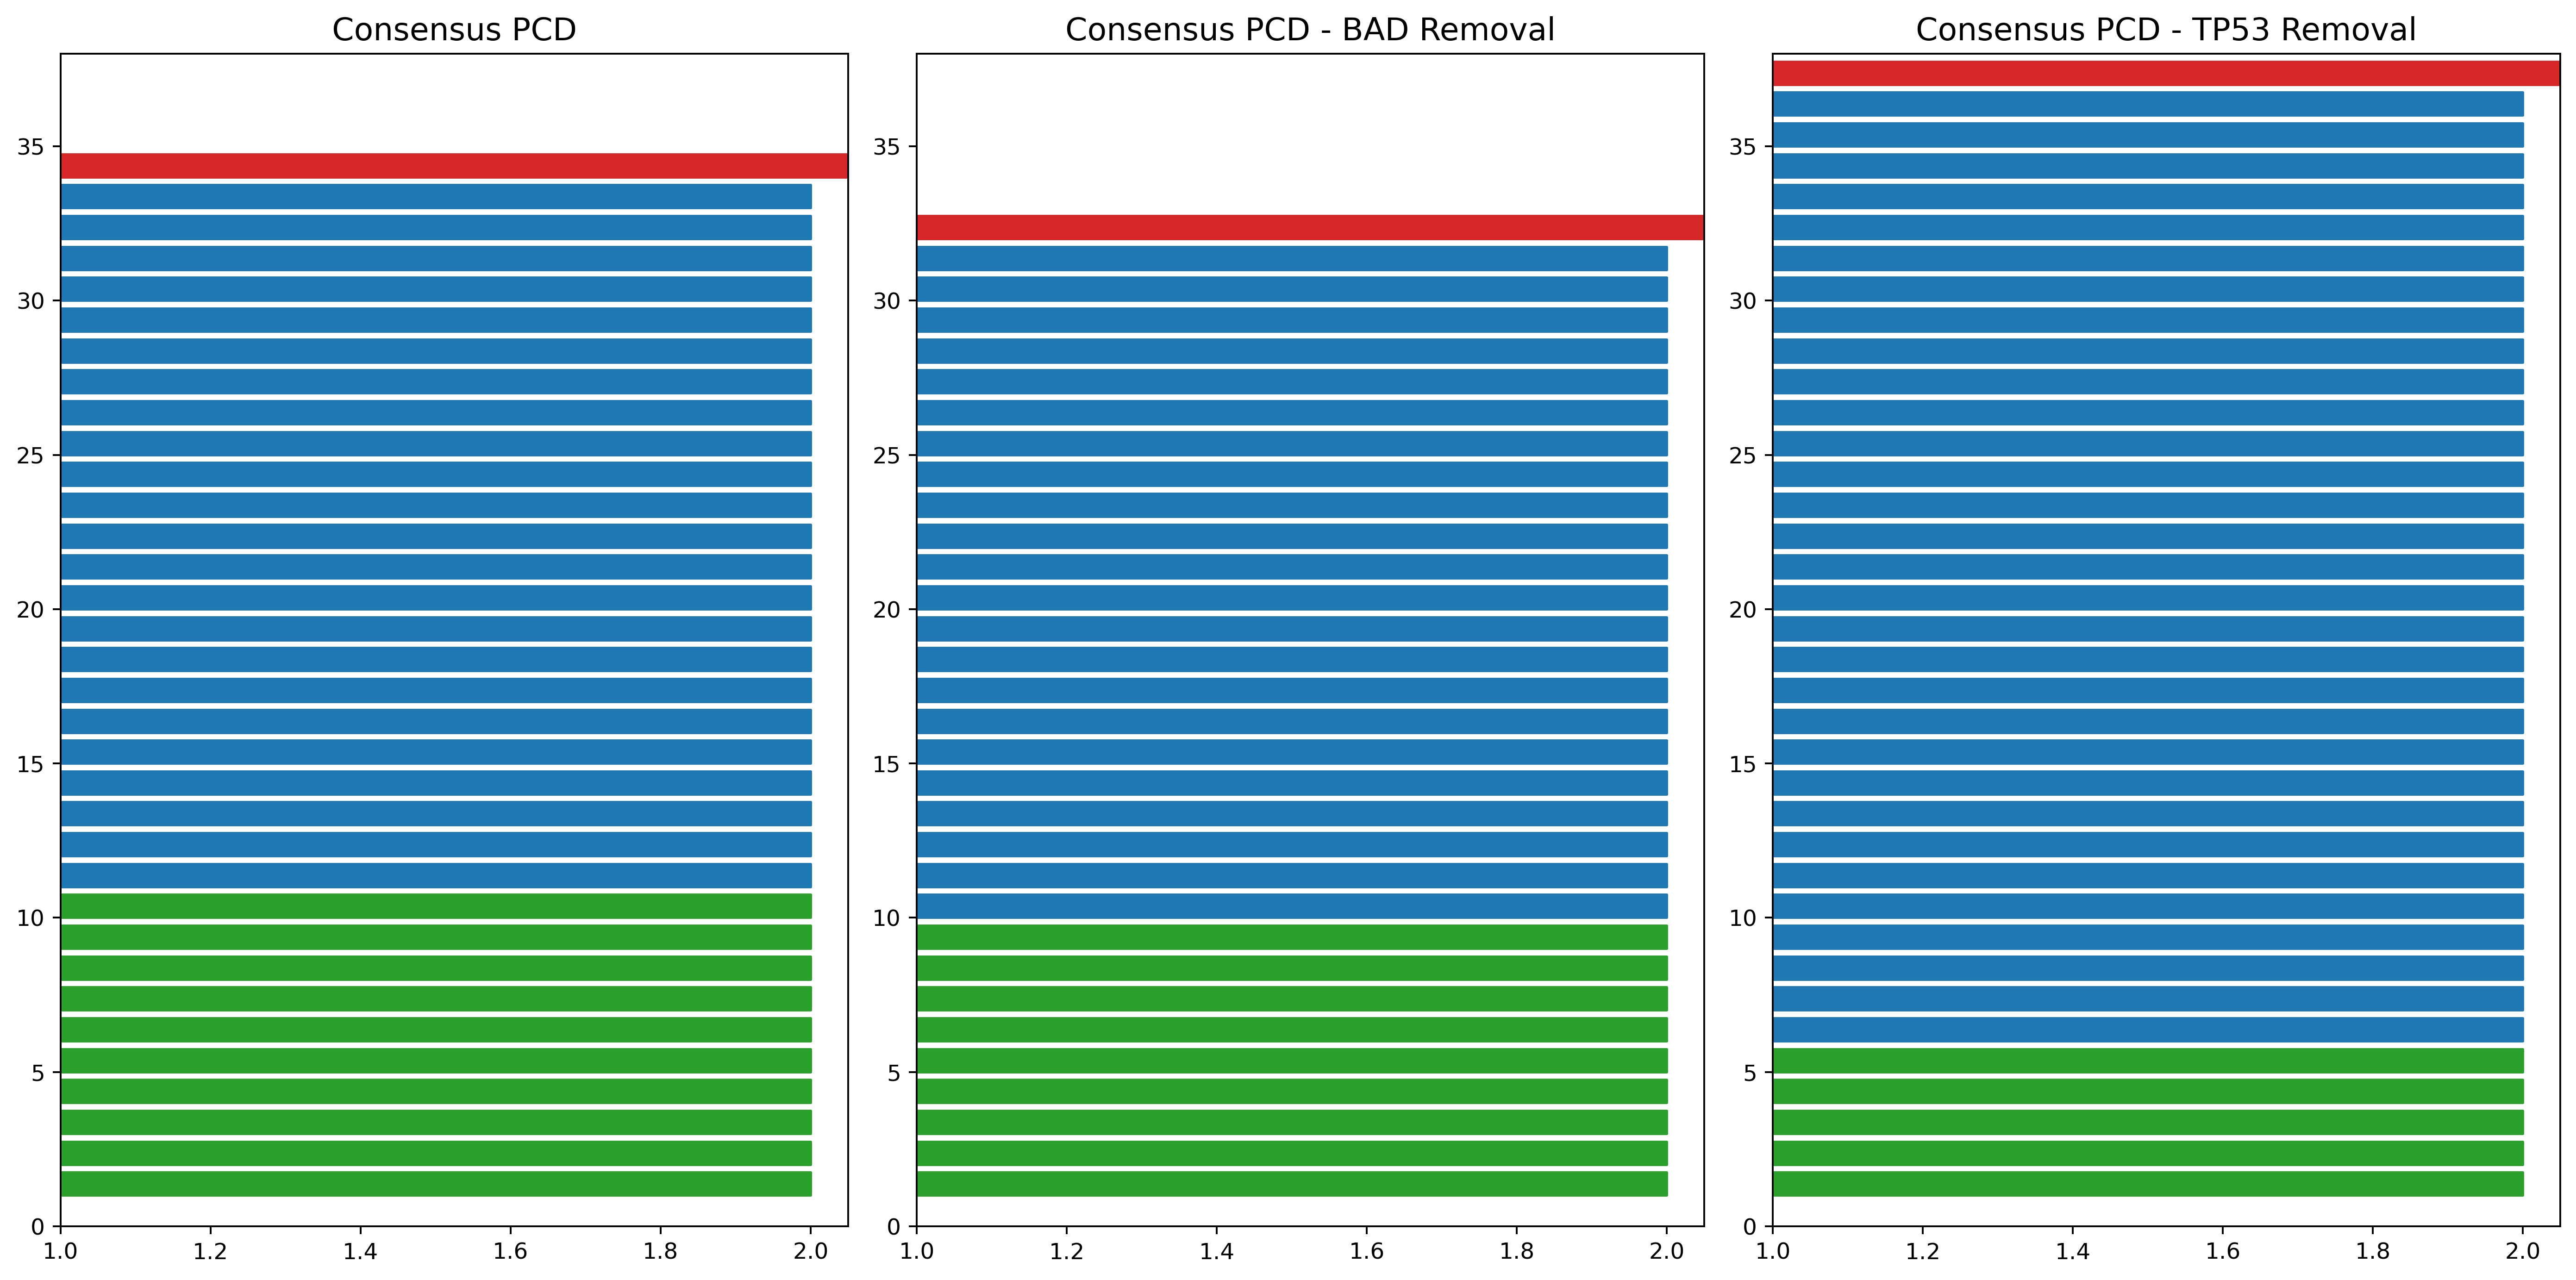

In [13]:
plt.figure(figsize=(16,8),dpi=350)

plt.subplot(1,3,1)
plotBarcode(barcodePCD)        
plt.title('Consensus PCD',fontsize=14)
plt.tight_layout()

plt.subplot(1,3,2)
plotBarcode(barcodeBAD)        
plt.title('Consensus PCD - BAD Removal',fontsize=14)
plt.tight_layout()

plt.subplot(1,3,3)
plotBarcode(barcodeTP53)        
plt.title('Consensus PCD - TP53 Removal',fontsize=14)
plt.tight_layout()

#plt.suptitle('Networks Barcodes\n',fontsize=20)
plt.tight_layout()
plt.savefig('4.1 output/barcodes table3 v3.png',facecolor='w')
plt.show()

## Calculate the position for centrality measures between impact and not impact genes

In [15]:
geneListDict["PCD newDrivers"]={"BAD"}
geneListDict["DNA newDrivers"]={"POLN"}
geneListDict["CHR newDrivers"]={"WDR77"}

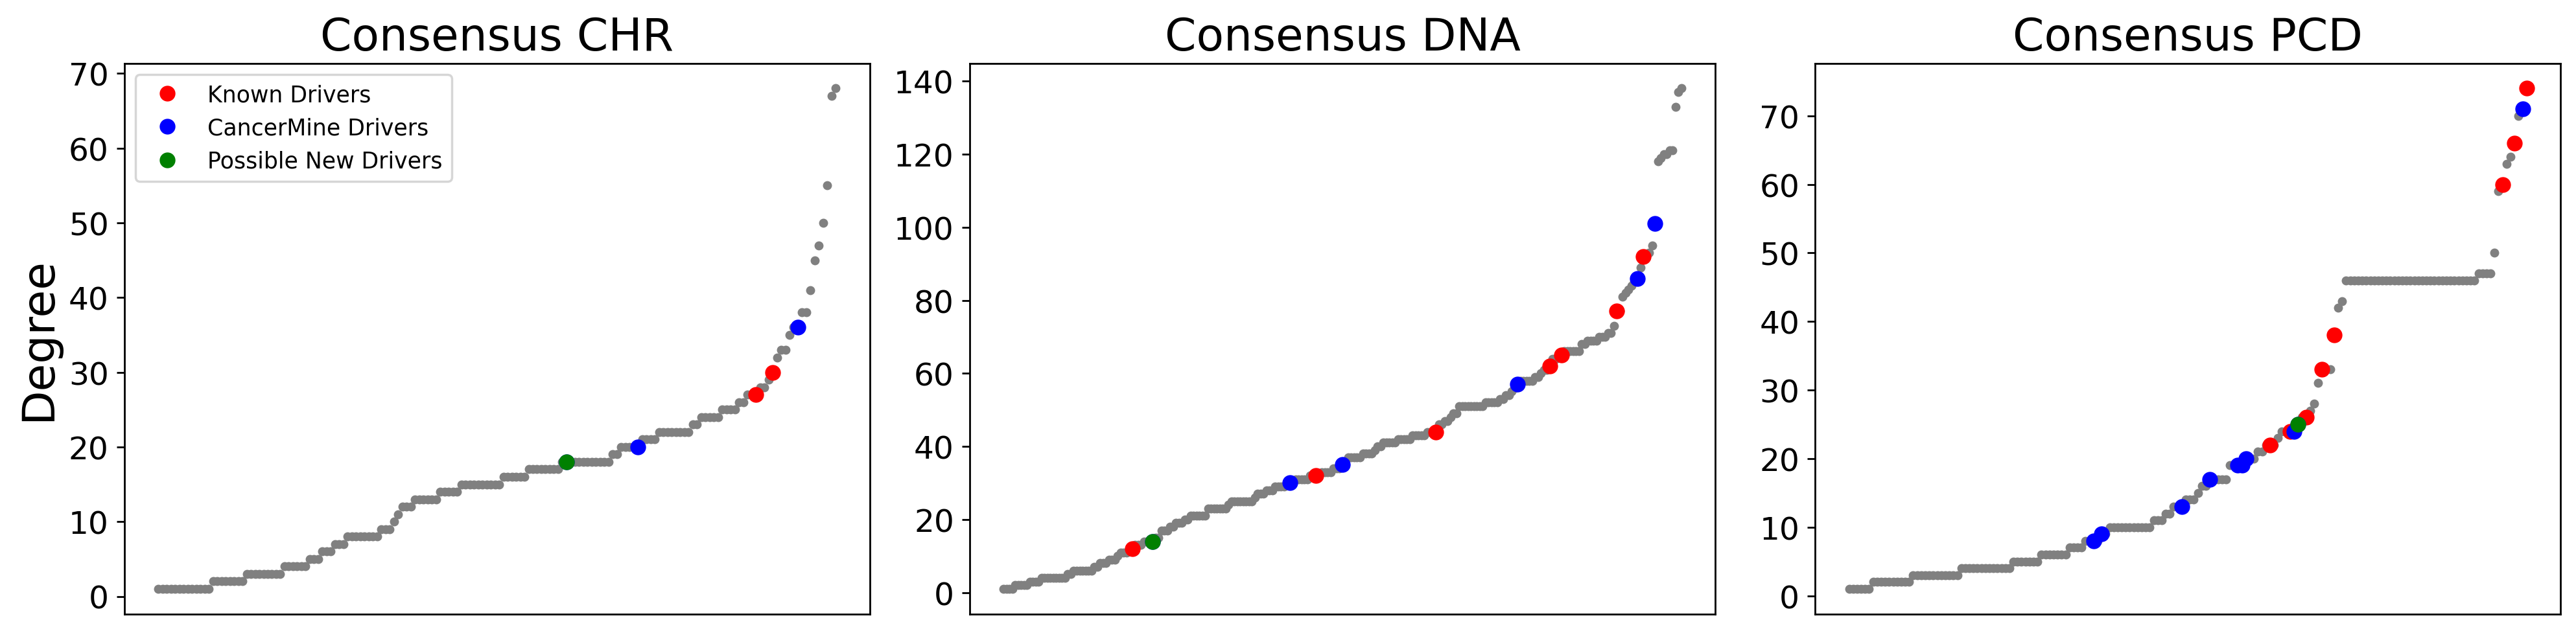

In [19]:
plt.figure(figsize=(16,4),dpi=250)
#Degree
i=1
for sp in ['CHR','DNA','PCD']:
    plt.subplot(1,3,i)
    
    degreeDict=dict(networks["Consensus "+sp].degree())
    degreeDict=dict(sorted(degreeDict.items(),key=lambda x:x[1],reverse=False))
    plt.plot(degreeDict.keys(),degreeDict.values(),".",color="gray")
    
    filterDict = {k: degreeDict[k] for k in geneListDict[sp+" Drivers"]}
    plt.plot(filterDict.keys(),filterDict.values(),"o",color="r",label="Known Drivers")
    
    filterDict = {k: degreeDict[k] for k in geneListDict[sp+" nonDrivers"]}
    plt.plot(filterDict.keys(),filterDict.values(),"o",color="b",label="CancerMine Drivers")
    
    filterDict = {k: degreeDict[k] for k in geneListDict[sp+" newDrivers"]}
    plt.plot(filterDict.keys(),filterDict.values(),"o",color="g",label="Possible New Drivers")
    
    plt.xticks([])
    plt.yticks(fontsize=14)
    if i==1:
        plt.ylabel("Degree",fontsize=20)
        plt.legend()
    plt.title("Consensus "+sp,fontsize=20)
    plt.tight_layout()
    i+=1
    
plt.tight_layout()
plt.savefig('4.1 output/centralityDistributionImpact.png',facecolor='w')
plt.show()
plt.close()

# FLAGs genes

In [15]:
#FLAGs Genes: https://bmcmedgenomics.biomedcentral.com/articles/10.1186/s12920-014-0064-y#additional-information
flagsDF = pd.read_csv("4.1 input/FLAGS.tsv",sep=";")
FLAGs=list(flagsDF.dropna().FLAGS)
print("FLAG len:",len(FLAGs))
for sp in ['CHR','DNA','PCD']:
    report={}
    name='Consensus '+sp
    G=networks[name]
    for f in FLAGs:
        if f in G.nodes:
            print(sp,f)

FLAG len: 100
CHR KMT2C
CHR KMT2D
DNA BRCA2
DNA HERC2
PCD PLEC


In [16]:
for sp in ['CHR','DNA','PCD']:
    print(geneListDict[sp+" Drivers"] & set(FLAGs))
    print(geneListDict[sp+" nonDrivers"] & set(FLAGs))

set()
set()
{'HERC2'}
set()
set()
set()


In [26]:
'HERC2' in list(intoGen.SYMBOL) , 'HERC2' in ncg_canonical

(True, False)

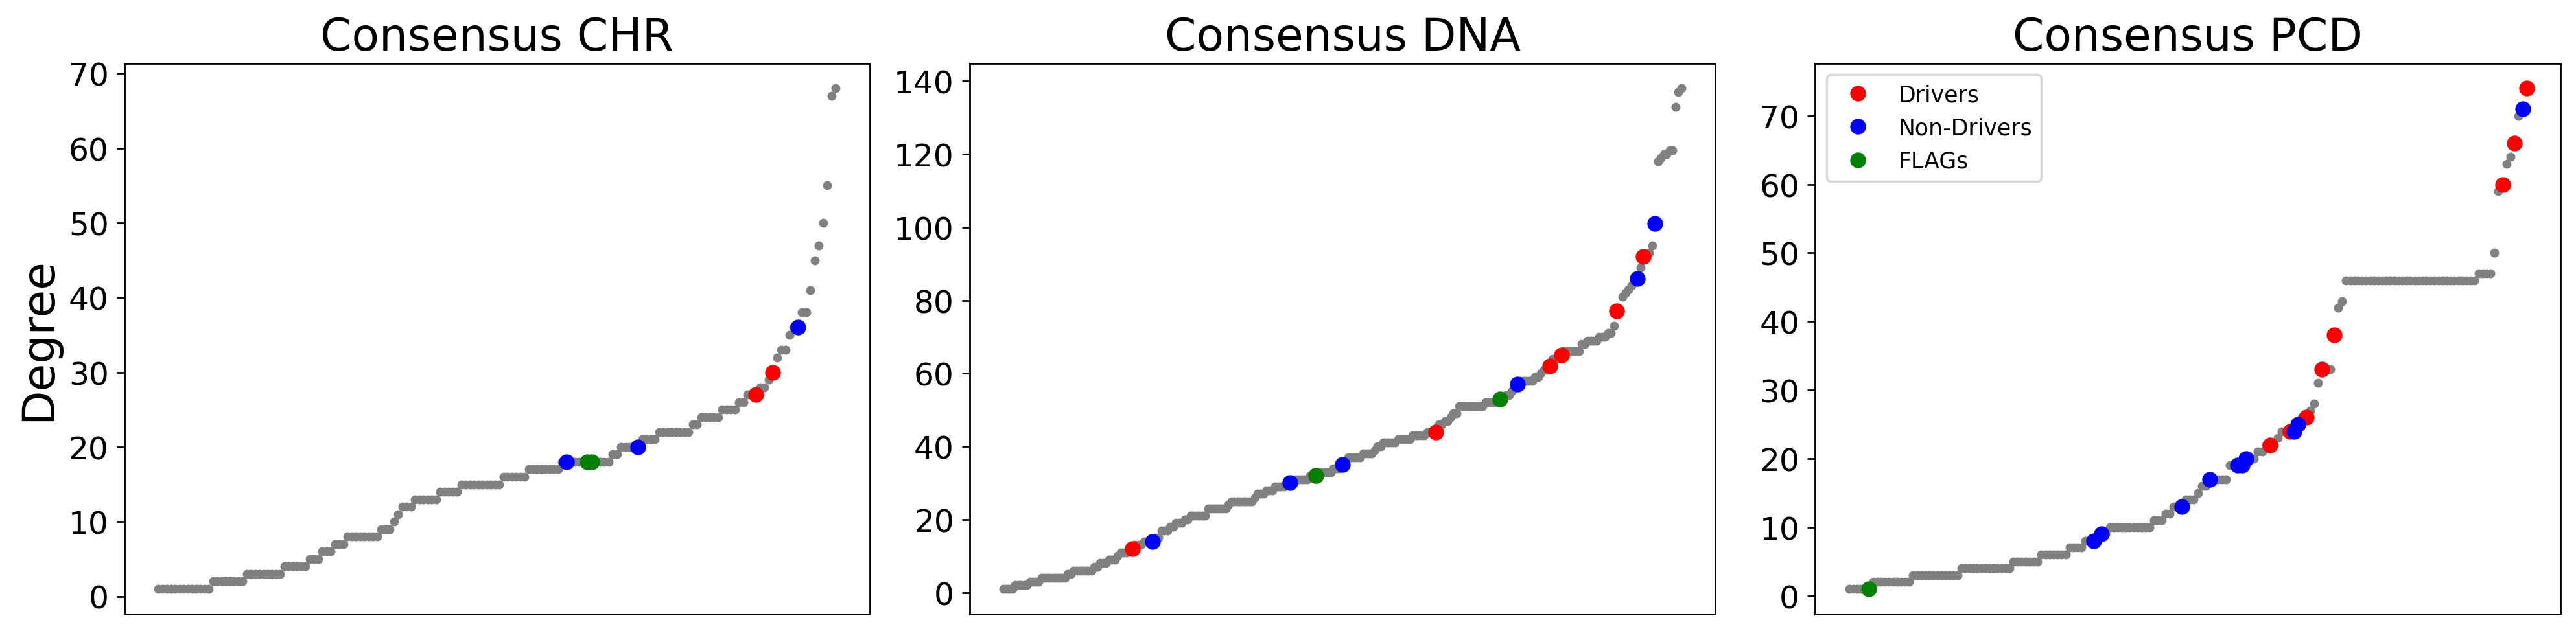

In [17]:
plt.figure(figsize=(16,4),dpi=250)
#Degree
i=1
for sp in ['CHR','DNA','PCD']:
    plt.subplot(1,3,i)
    
    degreeDict=dict(networks["Consensus "+sp].degree())
    degreeDict=dict(sorted(degreeDict.items(),key=lambda x:x[1],reverse=False))
    plt.plot(degreeDict.keys(),degreeDict.values(),".",color="gray")
    
    filterDict = {k: degreeDict[k] for k in geneListDict[sp+" Drivers"]}
    plt.plot(filterDict.keys(),filterDict.values(),"o",color="r",label="Drivers")
    
    filterDict = {k: degreeDict[k] for k in geneListDict[sp+" nonDrivers"]}
    plt.plot(filterDict.keys(),filterDict.values(),"o",color="b",label="Non-Drivers")
    
    filterDict = {k: degreeDict[k] for k in set(FLAGs)&set(networks["Consensus "+sp])}
    plt.plot(filterDict.keys(),filterDict.values(),"o",color="g",label="FLAGs")
    
    plt.xticks([])
    plt.yticks(fontsize=14)
    if i==1:
        plt.ylabel("Degree",fontsize=20)
    plt.title("Consensus "+sp,fontsize=20)
    plt.tight_layout()
    i+=1
    
plt.tight_layout()
plt.legend()
#plt.savefig('4.1 output/centralityDistributionImpact.png',facecolor='w')
plt.show()
plt.close()

# NCG Healthy Drivers

In [18]:
healthydrivers=pd.read_csv("4.1 input/NCG_healthydrivers_annotation_supporting_evidence.tsv",sep="\t")

In [19]:
for sp in ['CHR','DNA','PCD']:
    report={}
    name='Consensus '+sp
    G=networks[name]
    print(len(set(set(healthydrivers.symbol) & set(G.nodes))))

12
5
5


In [20]:
for sp in ['CHR','DNA','PCD']:
    report={}
    name='Consensus '+sp
    G=networks[name]
    print(sp)
    print("nonDrivers",len(geneListDict[sp+" nonDrivers"]),len(geneListDict[sp+" nonDrivers"]&set(healthydrivers.symbol)))
    print("Drivers",len(geneListDict[sp+" Drivers"]),len(geneListDict[sp+" Drivers"]&set(healthydrivers.symbol)))
    print()

CHR
nonDrivers 3 0
Drivers 2 0

DNA
nonDrivers 6 0
Drivers 7 1

PCD
nonDrivers 10 0
Drivers 8 3



# NCG False positives

In [21]:
falsePositives = ["BBS9","C3orf70","CELSR3","CNTN5","CNTNAP5","CSMD1","DNAH11","DNAH5","HSPB8","LRP2","MROH2B","NRXN1","NUP93","OR10A4","OR10AG1","OR10G8","OR10G9","OR11L1","OR2G6","OR2T33","OR2T4","OR4A16","OR4C13","OR4C3","OR4C46","OR4C6","OR4K1","OR5L1","OR5L2","OR5T1","OR6K3","OR8H2","OR8H3","OR9A2","PCLO","PDE3A","RYR2","TFPI2","TMCO4","TTN","ZEB2"]
for sp in ['CHR','DNA','PCD']:
    report={}
    name='Consensus '+sp
    G=networks[name]
    print(len(set(set(falsePositives) & set(G.nodes))))

0
0
0
